## **Classification and Regression with Bank Marketing Campaign dataset**

**3. Initial Results and the Code**

By: Marina Golberg 501072689 CIND820

Code and documentation for this project on GitHub repository as following: https://github.com/marinagolberg/CIND820-MarGolb.git

In [1]:
#!pip install SMOTE

In [2]:
#!pip install imblearn

In [3]:
#!pip install mlxtend  

In [4]:
#!pip install matplotlib

In [5]:
#!pip install seaborn

In [6]:
#pip install cufflinks

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif, SelectPercentile
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss 
from sklearn.feature_selection import SelectFromModel
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import average_precision_score

In [8]:
bank = pd.read_csv("bank-additional-full.csv", sep=';')

Attribute Information:

Input variables:

**Bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-

employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

https://archive.ics.uci.edu/ml/datasets/bank+marketing


**Exploratory Data Analysis and Cleaning**

In [9]:
bank.head(100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,services,married,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
96,42,management,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
97,53,admin.,divorced,university.degree,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
98,37,technician,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
#basic descriptive statistics
# higth sd in  "duration", "campaign","previous", emp.var.rate,cons.conf.idx which indicates a fairly wide spread of data
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
bank.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


std bigger then mean(duration,campaign,previous,emp.var.rate,cons.conf.idx)- high variation between values, and abnormal distribution for data.  A smaller standard deviation indicates that more of the data is clustered about the mean while, a larger once indicates the data are more spread out.

In [13]:
bank.shape

(41188, 21)

In [14]:

bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [15]:
#Some times, we want to know what percentage of the whole is
#for each value that appears in the column. 
#To calculate this in pandas with the value_counts()
#method, set the argument normalize to True.
bank['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

That makes it highly unbalanced, the positive class of target variable for 11.26%

In [16]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [17]:
#Check the datatypes of the attributes.
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [18]:
#Are there any missing values in the dataset?
bank.isnull().values.any()

False

In [19]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [20]:
bank.isin([0]).any().any()

True

In [21]:
#How many o values in every attribute
#Knn cannot have 0 or Nan 

bank.isin([0]).sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              4
campaign              0
pdays                15
previous          35563
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [22]:
#previous 35563 is "0" (35563/41188 no data in this attribute ,I will drop this attribute)
bank = bank.drop(['previous'], axis=1)

In [23]:
#Colculating the mean
duration_mean = bank['duration']
durationMean = duration_mean.mean()
durationMean

258.2850101971448

In [24]:
#replacing all 0 valeuse with mean of that column
bank = bank.replace(0, durationMean)

In [25]:
bank.isin([0]).any().any()

False

In [26]:
bank.isin([0]).sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [27]:
#In the ‘pdays’ column, it is observed that 999 makes 96% of the values of the column. 
#from attribute information 999 means client was not previously contacted.
# I suggest to drop this column as there is not enough information for further analysis.

bank['pdays'].value_counts(normalize=True)

999.00000    0.963217
3.00000      0.010658
6.00000      0.010003
4.00000      0.002865
9.00000      0.001554
2.00000      0.001481
7.00000      0.001457
12.00000     0.001408
10.00000     0.001263
5.00000      0.001117
13.00000     0.000874
11.00000     0.000680
1.00000      0.000631
15.00000     0.000583
14.00000     0.000486
8.00000      0.000437
258.28501    0.000364
16.00000     0.000267
17.00000     0.000194
18.00000     0.000170
22.00000     0.000073
19.00000     0.000073
21.00000     0.000049
25.00000     0.000024
26.00000     0.000024
27.00000     0.000024
20.00000     0.000024
Name: pdays, dtype: float64

In [28]:
bank = bank.drop(['pdays'], axis=1)


In [29]:
#In the ‘poutcome’ column, it is observed that nonexistent + 
#failure makes 96.6% of the values of the column. 
#from attribute information ‘poutcome’ is  outcome of
#the previous marketing campaign
# I will not drop this column as a success rate 3.3% 
#might be interesting for further analysis.
bank['poutcome'].value_counts(normalize=True)

nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64

In [30]:
#campaign: number of contacts performed during this campaign and for this client
bank['campaign'].value_counts(normalize=True)

1     0.428329
2     0.256628
3     0.129674
4     0.064363
5     0.038822
6     0.023769
7     0.015271
8     0.009712
9     0.006871
10    0.005463
11    0.004297
12    0.003035
13    0.002234
14    0.001675
17    0.001408
16    0.001238
15    0.001238
18    0.000801
20    0.000728
19    0.000631
21    0.000583
22    0.000413
23    0.000388
24    0.000364
27    0.000267
29    0.000243
28    0.000194
26    0.000194
25    0.000194
31    0.000170
30    0.000170
35    0.000121
32    0.000097
33    0.000097
34    0.000073
42    0.000049
40    0.000049
43    0.000049
56    0.000024
39    0.000024
41    0.000024
37    0.000024
Name: campaign, dtype: float64

In [31]:
bank['default'].value_counts(normalize=True)

no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64

In [32]:
#cons.conf.idx
bank['cons.conf.idx'].value_counts()


-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

In [33]:
#Creatind Dataframe in Panda
df = pd.DataFrame(bank)
#print(df)

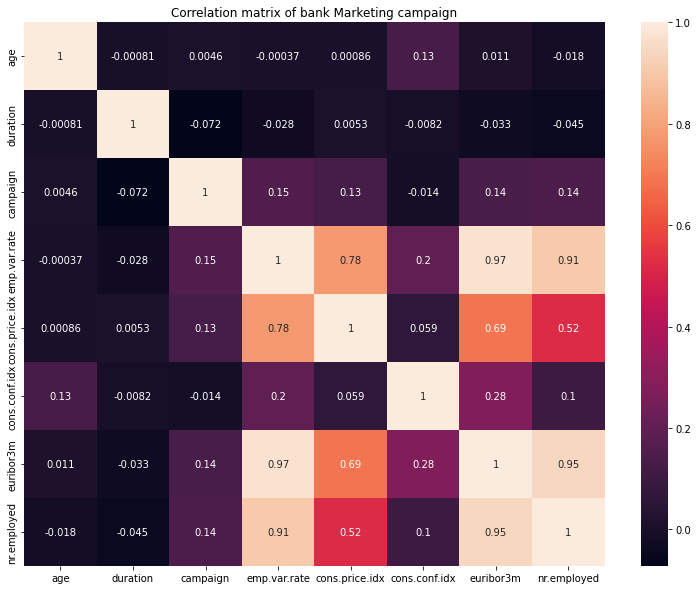

In [34]:
# taking all rows and 11 columns(without y)
plt.figure(figsize=(13, 10))
df_corr = bank.iloc[:,:18]
correlation_mat = df_corr.corr()
sns.heatmap(correlation_mat, annot = True);
plt.title("Correlation matrix of bank Marketing campaign")

#plt.xlabel("attributes")
#plt.ylabel("attributes")

plt.show()

The social and economic context attributes have correlation among themselves.
 All columns with a high correlation will be removed to prevent Multicollinearity, it happens when predictor variable can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results. The columns are 'emp.var.rate','euribor3m', and 'cons.conf.idx'.

In [35]:
bank = bank.drop(['emp.var.rate'], axis=1)
bank = bank.drop(['euribor3m'], axis=1)
bank = bank.drop(['cons.conf.idx'], axis=1)

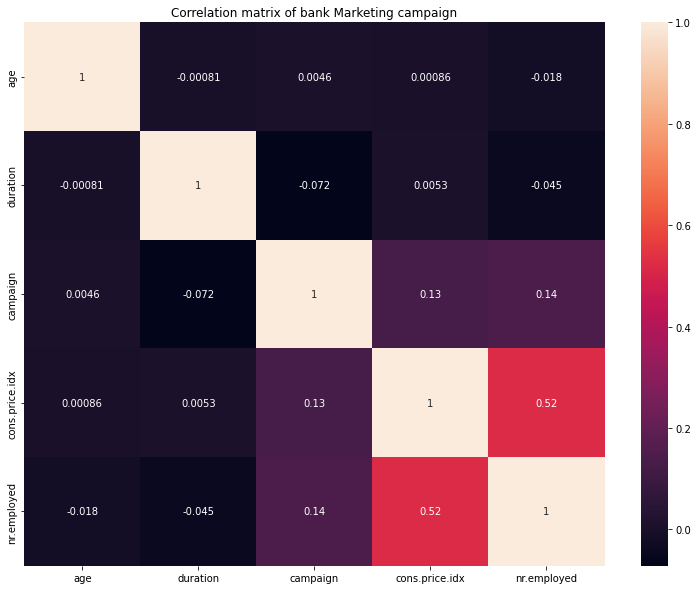

In [36]:
# taking all rows and 11 columns(without y)
plt.figure(figsize=(13, 10))
df_corr = bank.iloc[:,:15]
correlation_mat = df_corr.corr()
sns.heatmap(correlation_mat, annot = True);
plt.title("Correlation matrix of bank Marketing campaign")
plt.show()

In [38]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,nonexistent,93.994,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,nonexistent,93.994,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,nonexistent,93.994,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,nonexistent,93.994,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,nonexistent,93.994,5191.0,no


**Creating different data samples for training and testing.**

 In this way, we can use the training set for training our model and  testing set help evaluate whether the 
 model can generalise well to new, unseen data. In this way I will prevent overfiting.

I would divide the data set into 2 portions in the ratio of 70:30
My target variable is ‘y’  included in  training and test data samples, next stepts I will divide the data 
set into more 2 portions

In [39]:
training, testing = train_test_split(bank, test_size=0.3, random_state=25)

In [40]:
print(f"No. of training examples: {training.shape[0]}")
print(f"No. of testing examples: {testing.shape[0]}")

No. of training examples: 28831
No. of testing examples: 12357


In [41]:
#Let's check for duplicates
training.duplicated().any()

True

In [42]:
training.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,nr.employed,y
8726,39,admin.,single,high.school,no,no,no,telephone,jun,wed,172.0,2,nonexistent,94.465,5228.1,no
30619,50,entrepreneur,married,basic.9y,no,yes,no,telephone,may,mon,331.0,5,nonexistent,92.893,5099.1,yes
31121,30,blue-collar,divorced,high.school,unknown,no,no,cellular,may,wed,848.0,1,failure,92.893,5099.1,yes
37287,33,admin.,married,high.school,no,yes,no,cellular,aug,mon,252.0,1,success,92.201,5076.2,yes
38307,44,admin.,divorced,high.school,no,no,no,cellular,oct,thu,634.0,1,nonexistent,92.431,5017.5,no


In [43]:
#this doesn't seem like the case of some customers randomly having similar details. 
#It looks like the data duplication happened while entering the data.
training[training.duplicated(keep = False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.0,1,nonexistent,93.994,5191.0,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33.0,1,nonexistent,93.444,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128.0,1,nonexistent,93.918,5228.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348.0,4,nonexistent,92.893,5099.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128.0,1,nonexistent,93.918,5228.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348.0,4,nonexistent,92.893,5099.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33.0,1,nonexistent,93.444,5228.1,no
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.0,1,nonexistent,93.994,5191.0,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114.0,1,nonexistent,93.075,5099.1,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114.0,1,nonexistent,93.075,5099.1,no


In [45]:
#Let's remove these duplicate rows.
training.drop_duplicates(inplace = True)


In [46]:
training.shape

(28826, 16)

**Outliers Treatment**

In [47]:
#We need to install cufflinks to link plotly to pandas and add the iplot method:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

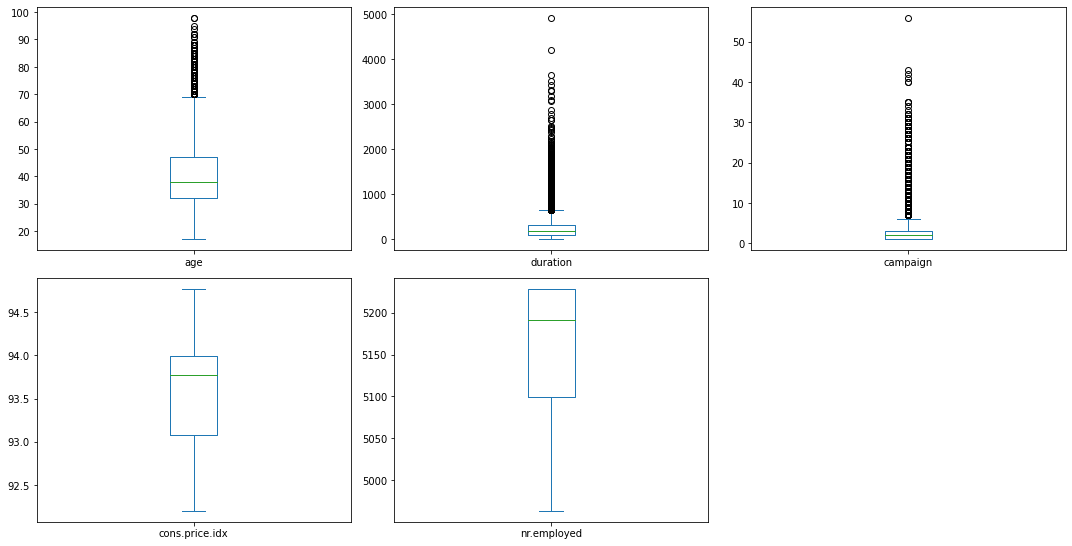

In [48]:
training.plot(kind='box',subplots=True,layout=(4,3),figsize=(15,15))
plt.tight_layout()

On the boxplot above looks like there are outliers. Age-appropriate for the context of the attribute
(min 17, max 98), Duration(is the last contact to the client in seconds max 4918 is 82 minutes for call
it's too long but can be real), and maximum of Campaign looks very high 56 calls to the same customer 
very high but real, std bigger than mean(duration, campaign)- high variation between values, and abnormal
distribution for data. Probably the minimum and maximum values are the mistakes and other values in my 
opinion are appropriate. I will be removing only percentile 10 and percentile 90 because different deletion
percentages will cause algorithms to perform worse.

In [57]:
min_duration, max_duration = training.duration.quantile([0.10, 0.90])
min_duration, max_duration

(84.0, 389.0)

In [58]:
training[training.duration < min_duration]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,nr.employed,y
7639,32,services,single,high.school,no,no,no,telephone,may,fri,67.0,2,nonexistent,93.994,5191.0,no
21018,58,admin.,married,university.degree,no,yes,no,telephone,aug,thu,60.0,1,nonexistent,93.444,5228.1,no
10258,39,services,divorced,high.school,no,yes,no,telephone,jun,mon,81.0,5,nonexistent,94.465,5228.1,no
8717,54,technician,married,professional.course,no,yes,no,telephone,jun,wed,80.0,6,nonexistent,94.465,5228.1,no
30901,29,admin.,single,university.degree,no,yes,yes,cellular,may,tue,76.0,1,failure,92.893,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38510,46,blue-collar,married,basic.9y,no,yes,no,cellular,oct,tue,65.0,1,failure,92.431,5017.5,no
29991,66,retired,married,basic.4y,no,yes,no,cellular,apr,tue,63.0,1,failure,93.075,5099.1,no
16690,24,services,single,high.school,no,no,no,cellular,jul,wed,74.0,5,nonexistent,93.918,5228.1,no
7570,29,services,married,high.school,no,no,no,telephone,may,fri,76.0,2,nonexistent,93.994,5191.0,no


In [59]:
training[training.duration > max_duration]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,nr.employed,y
31623,50,services,divorced,basic.9y,no,yes,no,cellular,may,thu,429.0,1,failure,92.893,5099.1,no
36063,28,blue-collar,married,basic.9y,no,yes,no,cellular,may,tue,390.0,1,nonexistent,92.893,5099.1,yes
24050,33,entrepreneur,married,university.degree,no,yes,no,telephone,oct,tue,454.0,1,nonexistent,93.798,5195.8,yes
12837,52,admin.,divorced,university.degree,unknown,yes,yes,cellular,jul,tue,401.0,2,nonexistent,93.918,5228.1,no
24716,45,self-employed,married,university.degree,no,yes,no,cellular,nov,mon,487.0,1,nonexistent,93.200,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4765,48,admin.,married,university.degree,no,yes,no,telephone,may,wed,396.0,1,nonexistent,93.994,5191.0,no
17224,26,services,married,high.school,no,yes,no,cellular,jul,fri,442.0,12,nonexistent,93.918,5228.1,no
9534,39,admin.,married,high.school,no,no,yes,telephone,jun,mon,422.0,1,nonexistent,94.465,5228.1,no
28839,30,blue-collar,married,basic.9y,no,yes,no,telephone,apr,thu,426.0,3,nonexistent,93.075,5099.1,yes


In [60]:
training = training[(training.duration<max_duration)&(training.duration>min_duration)]
training.shape

(18302, 16)

In [61]:
training.describe()

,age,duration,campaign,cons.price.idx,nr.employed
count,18302.000000,18302.000000,18302.000000,18302.000000,18302.000000
mean,40.119058,196.195381,2.319528,93.570568,5165.087143
std,10.550457,80.425571,2.174224,0.581594,73.410937
min,17.000000,85.000000,1.000000,92.201000,4963.600000
25%,32.000000,128.000000,1.000000,93.075000,5099.100000
50%,38.000000,180.000000,2.000000,93.749000,5191.000000
75%,47.000000,252.000000,3.000000,93.994000,5228.100000
max,98.000000,388.000000,56.000000,94.767000,5228.100000


In [62]:
min_campaign, max_campaign = training.campaign.quantile([0.10, 0.90])
min_campaign, max_campaign

(1.0, 4.0)

In [63]:
training[training.campaign < min_campaign]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,nr.employed,y


In [64]:
training[training.campaign > max_campaign]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,nr.employed,y
30619,50,entrepreneur,married,basic.9y,no,yes,no,telephone,may,mon,331.0,5,nonexistent,92.893,5099.1,yes
11493,49,admin.,divorced,high.school,no,yes,no,telephone,jun,fri,115.0,20,nonexistent,94.465,5228.1,no
8492,35,blue-collar,married,basic.4y,unknown,yes,no,telephone,jun,wed,180.0,6,nonexistent,94.465,5228.1,no
37111,31,admin.,single,high.school,no,no,yes,telephone,jul,tue,258.0,6,nonexistent,92.469,5076.2,no
16807,56,services,married,high.school,unknown,yes,no,telephone,jul,thu,279.0,11,nonexistent,93.918,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12198,40,admin.,divorced,high.school,no,no,no,telephone,jul,wed,96.0,7,nonexistent,93.918,5228.1,no
15326,53,management,married,high.school,no,no,no,cellular,jul,fri,91.0,10,nonexistent,93.918,5228.1,no
30055,61,admin.,married,university.degree,no,yes,yes,cellular,apr,thu,266.0,5,nonexistent,93.075,5099.1,yes
4148,24,admin.,single,high.school,no,yes,no,telephone,may,mon,243.0,6,nonexistent,93.994,5191.0,no


In [65]:
training = training[(training.campaign<max_campaign)]
training.shape

(15371, 16)

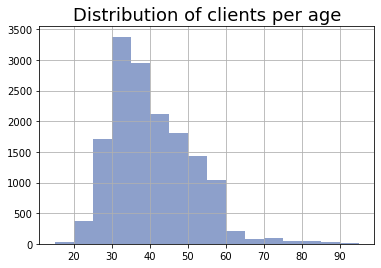

In [66]:
#Let's see the distribution of clients per age.
base_color = sns.color_palette('Set2')[2]

age_bins = np.arange(15, 100, 5)
plt.hist(data = training, x = 'age', bins = age_bins, color = base_color);
plt.title("Distribution of clients per age", fontsize=18)
plt.grid();

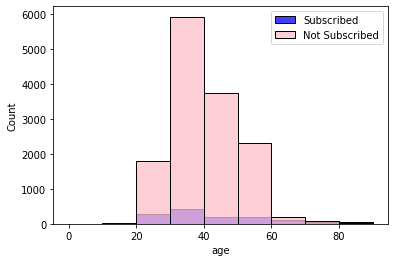

In [67]:
#Visualize the relationship between feature category vs dependent variable y
#type of age and deposit
bins = range(0, 100, 10)
ax = sns.histplot(training.age[training.y=='yes'],
              color='blue', kde=False, bins=bins, label='Subscribed')
sns.histplot(training.age[training.y=='no'],
         ax=ax,  # Overplots on first plot
         color='pink', kde=False, bins=bins, label="Not Subscribed")
plt.legend()
plt.show()

Customers who in (30-40) followed by (20-30)
and (40-50) had higher percentage of subscription to deposit account

In [68]:
#Crosstab to display job stats with respect to y  class variable
pd.crosstab(index=training["job"], columns=training["y"])


y,no,yes
job,,
admin.,3406,409
blue-collar,3419,86
entrepreneur,509,21
housemaid,380,27
management,1020,99
retired,478,176
self-employed,485,42
services,1409,60
student,249,105


In [69]:
# Get names of indexes for which column job has value unknown
indexNames = training[ training['job'] == "unknown"].index



In [70]:
# Delete these row indexes from dataFrame
training.drop(indexNames , inplace=True)


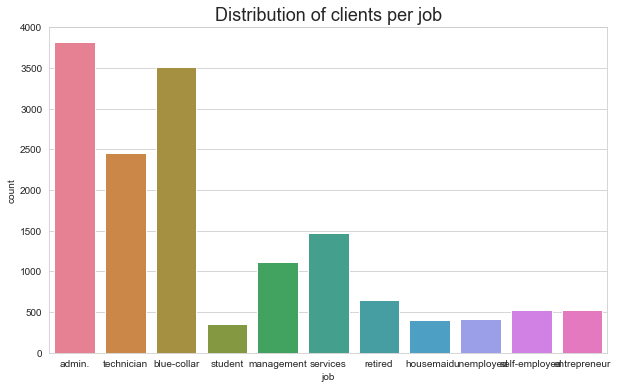

In [71]:
#Let's see the distribution of clients per job.
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per job", fontsize=18)
sns.countplot(x="job", data=training, palette='husl');

<AxesSubplot:title={'center':'Job and deposit'}>

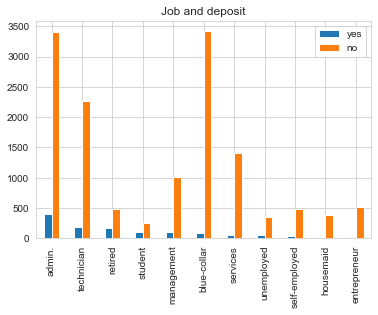

In [72]:
#Visualization of relationship between feature category vs dependent variable y
#job and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = training[training['y'] == 'yes']['job'].value_counts()
j_bank['no'] = training[training['y'] == 'no']['job'].value_counts()

j_bank.plot.bar(title = 'Job and deposit')

Customers who worked in administrative position  followed by technicians and blue collar  made deposits

In [73]:
#Crosstab to display merital stats with respect to y  class variable
pd.crosstab(index=training["marital"], columns=training["y"])

y,no,yes
marital,,
divorced,1553,127
married,8607,647
single,3787,499
unknown,20,2


In [74]:
# Get names of indexes for which column job has value unknown
indexMarital = training[ training['marital'] == "unknown"].index

In [75]:
# Delete these row indexes from dataFrame
training.drop(indexMarital , inplace=True)


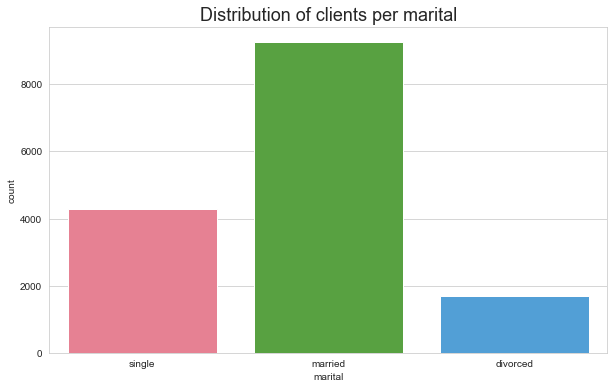

In [76]:
#Let's see the distribution of clients per job.
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per marital", fontsize=18)
sns.countplot(x="marital", data=training, palette='husl');

<AxesSubplot:title={'center':'Marital status and deposit'}>

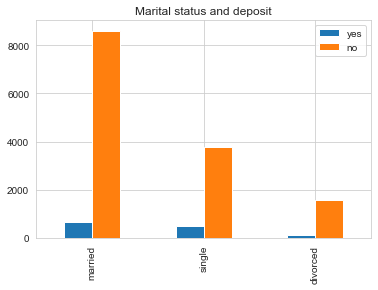

In [77]:
#Visualize the relationship between feature category vs dependent variable y
#marital status and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = training[training['y'] == 'yes']['marital'].value_counts()
j_bank['no'] = training[training['y'] == 'no']['marital'].value_counts()

j_bank.plot.bar(title = 'Marital status and deposit')

Married customers  followed by single had made deposits

In [78]:
#Crosstab to display education stats with respect to y  class variable
pd.crosstab(index=training["education"], columns=training["y"])

y,no,yes
education,,
basic.4y,1450,129
basic.6y,853,31
basic.9y,2133,82
high.school,3252,280
illiterate,4,1
professional.course,1743,169
university.degree,3988,512
unknown,524,69


In [79]:
# Get names of indexes for which column education has value unknown and illiterate
indexEducation = training[ training['education'] == "illiterate"].index
indexEducation2 = training[ training['education'] == "unknown"].index

In [80]:
# Delete these row indexes from dataFrame
training.drop(indexEducation , inplace=True)
training.drop(indexEducation2 , inplace=True)

In [81]:
#Lets group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”
training['education']=np.where(training['education'] =='basic.9y', 'Basic', training['education'])
training['education']=np.where(training['education'] =='basic.6y', 'Basic', training['education'])
training['education']=np.where(training['education'] =='basic.4y', 'Basic', training['education'])

In [82]:
training['education'].unique()

array(['high.school', 'university.degree', 'professional.course', 'Basic'],
      dtype=object)

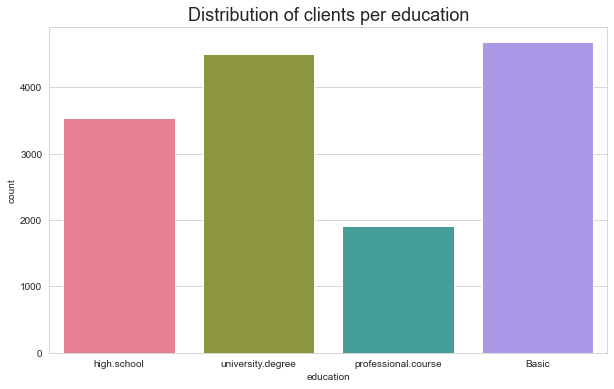

In [83]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per education", fontsize=18)
sns.countplot(x="education", data=training, palette='husl');

<AxesSubplot:title={'center':'Type of education and deposit'}>

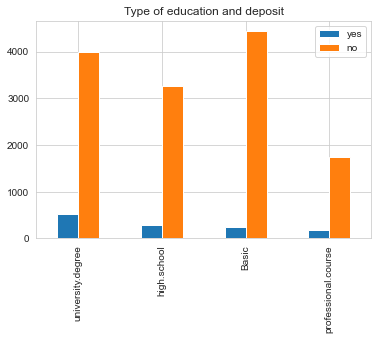

In [84]:
#Visualize the relationship between feature category vs dependent variable y
#type of education and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = training[training['y'] == 'yes']['education'].value_counts()
j_bank['no'] = training[training['y'] == 'no']['education'].value_counts()

j_bank.plot.bar(title = 'Type of education and deposit')

Customers who had university degree followed by highschool had higher chence of making a deposit.

In [85]:
#Crosstab to display housing stats with respect to y  class variable
pd.crosstab(index=training["housing"], columns=training["y"])

y,no,yes
housing,,
no,6038,484
unknown,332,33
yes,7049,686


In [86]:
# Get names of indexes for which column housing has value unknown
indexhousing = training[ training['housing'] == "unknown"].index

In [87]:
# Delete these row indexes from dataFrame
training.drop(indexhousing , inplace=True)

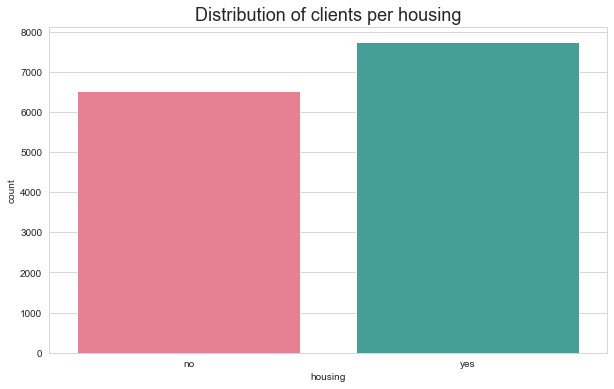

In [88]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per housing", fontsize=18)
sns.countplot(x="housing", data=training, palette='husl');

<AxesSubplot:title={'center':'Type of housing and deposit'}>

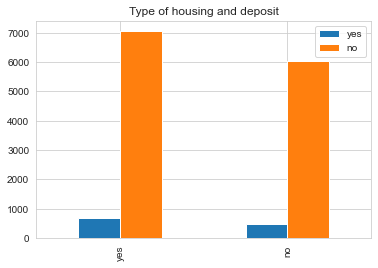

In [89]:
#Visualize the relationship between feature category vs dependent variable y
#type of housing and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = training[training['y'] == 'yes']['housing'].value_counts()
j_bank['no'] = training[training['y'] == 'no']['housing'].value_counts()

j_bank.plot.bar(title = 'Type of housing and deposit')

Customers who had house had higher chance in making a deposit.

In [90]:
#Crosstab to display default stats with respect to y  class variable
pd.crosstab(index=training["default"], columns=training["y"])

y,no,yes
default,,
no,10349,1142
unknown,2736,28
yes,2,0


<AxesSubplot:title={'center':'Type of default and deposit'}>

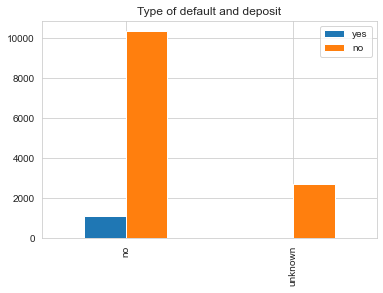

In [91]:
#Visualize the relationship between feature category vs dependent variable y
#type of default and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = training[training['y'] == 'yes']['default'].value_counts()
j_bank['no'] = training[training['y'] == 'no']['default'].value_counts()

j_bank.plot.bar(title = 'Type of default and deposit')

Customers who had no default had higher chance in making a deposit.

In [92]:
#Crosstab to display  with y class variable
pd.crosstab(index=training["loan"], columns=training["y"])

y,no,yes
loan,,
no,11048,1015
yes,2039,155


In [93]:
# Get names of indexes for which column loan has value unknown
indexloan = training[ training['loan'] == "unknown"].index

In [94]:
# Delete these row indexes from dataFrame
training.drop(indexloan , inplace=True)

<AxesSubplot:title={'center':'Type of loan and deposit'}>

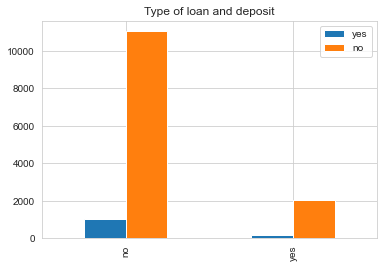

In [95]:
#Visualize the relationship between feature category vs dependent variable y
#type of loan and deposit
j_bank = pd.DataFrame()


j_bank['yes'] = training[training['y'] == 'yes']['loan'].value_counts()
j_bank['no'] = training[training['y'] == 'no']['loan'].value_counts()

j_bank.plot.bar(title = 'Type of loan and deposit')

Clients that had no loan had a higher chance to subscribe to term deposits

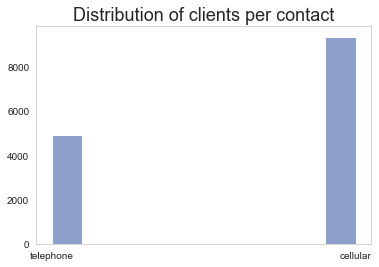

In [96]:
base_color = sns.color_palette('Set2')[2]
plt.hist(data = training, x = 'contact', color = base_color);
plt.title("Distribution of clients per contact", fontsize=18)
plt.grid();


<AxesSubplot:title={'center':'Type of contact and deposit'}>

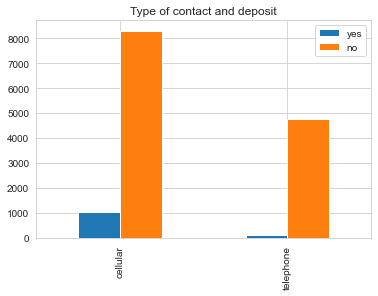

In [97]:
#Visualize the relationship between feature category vs dependent variable y
#type of contact and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = training[training['y'] == 'yes']['contact'].value_counts()
j_bank['no'] = training[training['y'] == 'no']['contact'].value_counts()

j_bank.plot.bar(title = 'Type of contact and deposit')

Clients that was contacted by cellular had a higher chance to subscribe for term deposits

In [98]:
#Crosstab to display contact stats with respect to y  class variable
pd.crosstab(index=training["contact"], columns=training["y"])

y,no,yes
contact,,
cellular,8301,1058
telephone,4786,112


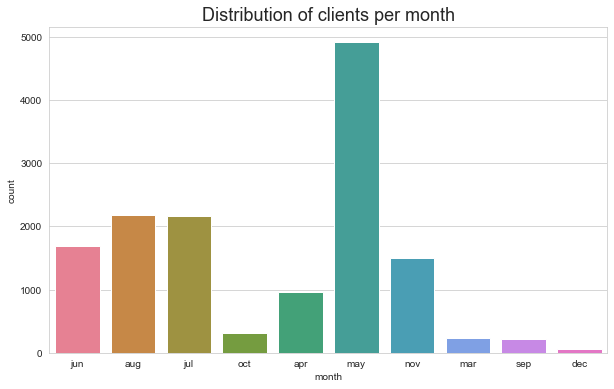

In [99]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per month", fontsize=18)
sns.countplot(x="month", data=training, palette='husl');

In [100]:
#Crosstab to display contact stats with respect to y  class variable
pd.crosstab(index=training["month"], columns=training["y"])

y,no,yes
month,,
apr,793,161
aug,2022,164
dec,31,22
jul,2087,84
jun,1538,157
mar,102,130
may,4813,100
nov,1399,107
oct,182,139


<AxesSubplot:title={'center':'Month and deposit'}>

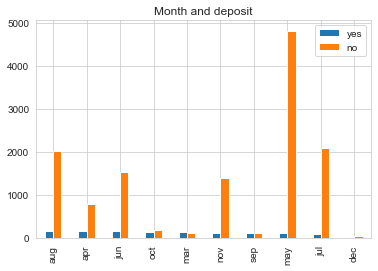

In [101]:
#Visualize the relationship between feature category vs dependent variable y
#Month and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = training[training['y'] == 'yes']['month'].value_counts()
j_bank['no'] = training[training['y'] == 'no']['month'].value_counts()

j_bank.plot.bar(title = 'Month and deposit')

Most of the deposist made during May followed by  August , July and June 

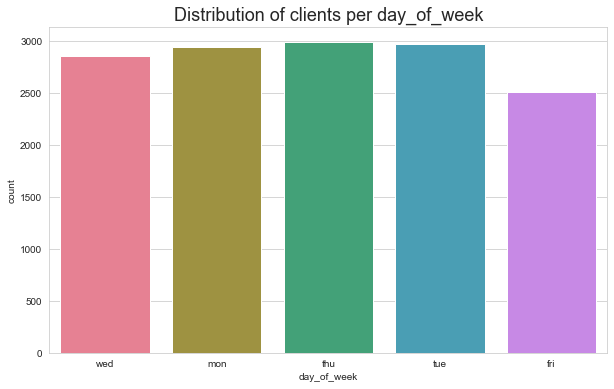

In [102]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per day_of_week", fontsize=18)
sns.countplot(x="day_of_week", data=training, palette='husl');

In [103]:
#Crosstab to display day_of_week stats with respect to y  class variable
pd.crosstab(index=training["day_of_week"], columns=training["y"])

y,no,yes
day_of_week,,
fri,2307,197
mon,2710,228
thu,2719,268
tue,2716,256
wed,2635,221


Less deposist made on Friday

<AxesSubplot:title={'center':'Day of week and deposit'}>

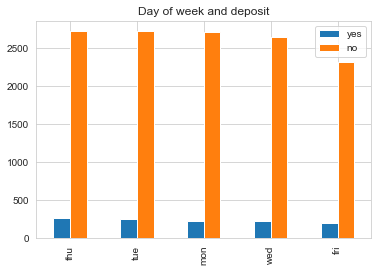

In [104]:
#Visualize the relationship between feature category vs dependent variable y
j_bank = pd.DataFrame()

j_bank['yes'] = training[training['y'] == 'yes']['day_of_week'].value_counts()
j_bank['no'] = training[training['y'] == 'no']['day_of_week'].value_counts()

j_bank.plot.bar(title = 'Day of week and deposit')

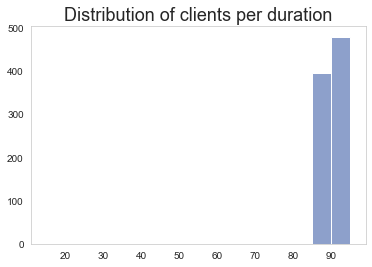

In [105]:
base_color = sns.color_palette('Set2')[2]

duration_bins = np.arange(15, 100, 5)
plt.hist(data = training, x = 'duration', bins = duration_bins, color = base_color);
plt.title("Distribution of clients per duration", fontsize=18)
plt.grid();

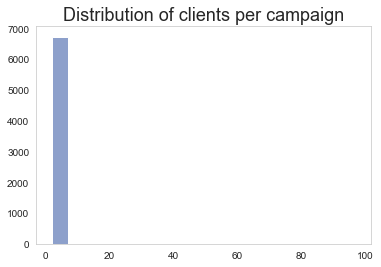

In [106]:
base_color = sns.color_palette('Set2')[2]

campaign_bins = np.arange(2, 100, 5)
plt.hist(data = training, x = 'campaign', bins = campaign_bins, color = base_color);
plt.title("Distribution of clients per campaign", fontsize=18)
plt.grid();

In [107]:

fig = px.scatter(training, y="campaign", x="duration", color="y")
fig.show()

In [108]:
#Crosstab to display default stats with respect to y  class variable
pd.crosstab(index=training["campaign"], columns=training["y"])

y,no,yes
campaign,,
1,6825,705
2,4248,326
3,2014,139


campaign: is a number of contacts to client

Duration: is last contact duration, in seconds
    
As more as employees contacted customers the less likely they  made deposit

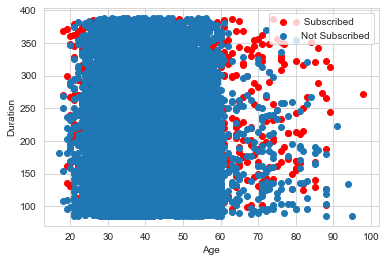

In [109]:
plt.scatter(x=training.age[training.y=='yes'], y=training.duration[(training.y=='yes')], c="red")
plt.scatter(x=training.age[training.y=='no'], y=training.duration[(training.y=='no')])
plt.legend([" Subscribed", "Not Subscribed"])
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

In [110]:

fig = px.box(training, x="job", y="duration", color="y")
fig.update_traces(quartilemethod="exclusive")
fig.show()

The longer conversation with clients , the more likly they made deposit.

Comparing the median, the blue collar, entrepreneur and services had high duration of calls

**Categorical Treatment**

The dataset contains object type variables using sklearn's preprocessing tool I will encode all  variables to numerical labels.

In [111]:
#build a new dataframe containing only the object columns.
obj_bank = training.select_dtypes(include=['object']).copy()
obj_bank.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
8726,admin.,single,high.school,no,no,no,telephone,jun,wed,nonexistent,no
37287,admin.,married,high.school,no,yes,no,cellular,aug,mon,success,yes
20981,technician,single,university.degree,no,yes,no,cellular,aug,thu,nonexistent,no
36959,admin.,single,university.degree,no,yes,no,cellular,jul,thu,nonexistent,yes
36423,student,single,high.school,no,no,no,cellular,jun,tue,nonexistent,yes


In [112]:
training["month"].value_counts()


may    4913
aug    2186
jul    2171
jun    1695
nov    1506
apr     954
oct     321
mar     232
sep     226
dec      53
Name: month, dtype: int64

In [113]:
training.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,nr.employed,y
8726,39,admin.,single,high.school,no,no,no,telephone,jun,wed,172.0,2,nonexistent,94.465,5228.1,no
37287,33,admin.,married,high.school,no,yes,no,cellular,aug,mon,252.0,1,success,92.201,5076.2,yes
20981,32,technician,single,university.degree,no,yes,no,cellular,aug,thu,118.0,2,nonexistent,93.444,5228.1,no
36959,46,admin.,single,university.degree,no,yes,no,cellular,jul,thu,309.0,1,nonexistent,92.469,5076.2,yes
36423,23,student,single,high.school,no,no,no,cellular,jun,tue,310.0,1,nonexistent,92.963,5076.2,yes


In [114]:
training["day_of_week"].value_counts()

thu    2987
tue    2972
mon    2938
wed    2856
fri    2504
Name: day_of_week, dtype: int64

In [115]:
#I will be converting the month and day by it's corresponding number for training set 
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
training['month']= training['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
training['day_of_week']= training['day_of_week'].map(day_dict)
training.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,nr.employed,y
8726,39,admin.,single,high.school,no,no,no,telephone,6,4,172.0,2,nonexistent,94.465,5228.1,no
37287,33,admin.,married,high.school,no,yes,no,cellular,8,2,252.0,1,success,92.201,5076.2,yes
20981,32,technician,single,university.degree,no,yes,no,cellular,8,5,118.0,2,nonexistent,93.444,5228.1,no
36959,46,admin.,single,university.degree,no,yes,no,cellular,7,5,309.0,1,nonexistent,92.469,5076.2,yes
36423,23,student,single,high.school,no,no,no,cellular,6,3,310.0,1,nonexistent,92.963,5076.2,yes


In [116]:
#I will be converting the month and day by it's corresponding number for testing set 
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
testing['month']= testing['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
testing['day_of_week']= testing['day_of_week'].map(day_dict)
testing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,nr.employed,y
37499,32,services,married,high.school,no,no,no,cellular,8,5,100.0,1,nonexistent,92.201,5076.2,no
23884,43,technician,married,high.school,no,yes,no,cellular,8,6,60.0,1,nonexistent,93.444,5228.1,no
32970,27,services,married,basic.9y,no,yes,no,cellular,5,2,220.0,2,nonexistent,92.893,5099.1,no
30374,28,admin.,married,university.degree,no,no,no,cellular,4,5,115.0,2,failure,93.075,5099.1,no
12442,42,housemaid,divorced,basic.4y,unknown,no,no,cellular,7,2,461.0,2,nonexistent,93.918,5228.1,no


In [117]:
#The dataset contains nine object type variables. I will use 
#a custom function by sklearn's preprocessing tool 
#to convert all nine variables to numerical labels for training set.
LabEn=LabelEncoder()

categorical_var=['job','marital', 'education','contact', 'poutcome', 'housing','default','loan','y']
for i in categorical_var:
    training[i]=LabEn.fit_transform(training[i])
    
training.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,nr.employed,y
8726,39,0,2,1,0,0,0,1,6,4,172.0,2,1,94.465,5228.1,0
37287,33,0,1,1,0,1,0,0,8,2,252.0,1,2,92.201,5076.2,1
20981,32,9,2,3,0,1,0,0,8,5,118.0,2,1,93.444,5228.1,0
36959,46,0,2,3,0,1,0,0,7,5,309.0,1,1,92.469,5076.2,1
36423,23,8,2,1,0,0,0,0,6,3,310.0,1,1,92.963,5076.2,1


In [118]:
#The dataset contains nine object type variables. I will use a custom function by sklearn's preprocessing tool 
#to convert all nine variables to numerical labels for testing set.
LabEn=LabelEncoder()

categorical_var=['job','marital', 'education','contact', 'poutcome', 'housing','default','loan','y']
for i in categorical_var:
    testing[i]=LabEn.fit_transform(testing[i])
    
testing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,nr.employed,y
37499,32,7,1,3,0,0,0,0,8,5,100.0,1,1,92.201,5076.2,0
23884,43,9,1,3,0,2,0,0,8,6,60.0,1,1,93.444,5228.1,0
32970,27,7,1,2,0,2,0,0,5,2,220.0,2,1,92.893,5099.1,0
30374,28,0,1,6,0,0,0,0,4,5,115.0,2,0,93.075,5099.1,0
12442,42,3,0,0,1,0,0,0,7,2,461.0,2,1,93.918,5228.1,0


In [119]:
#Checking if I didn't get any NaN valeuse when new lebels was created in training set
training.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
poutcome          0
cons.price.idx    0
nr.employed       0
y                 0
dtype: int64

In [120]:
#Checking if I didn't get any NaN valeuse when new lebels was created in testing set
testing.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
poutcome          0
cons.price.idx    0
nr.employed       0
y                 0
dtype: int64

**Divide the dataset to training (X_train, y_train) and test (X_test, y_test )sets.**

My data set alredy divided  into 2 portions in the ratio of 70:30, my target variable is ‘y’ 

In [121]:
X_train= training.drop("y",axis=1)
y_train= training["y"]

In [122]:
X_test= testing.drop("y",axis=1)
y_test= testing["y"]

In [123]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14257, 15)
(14257,)
(12357, 15)
(12357,)


In [124]:
y_test.head()

37499    0
23884    0
32970    0
30374    0
12442    0
Name: y, dtype: int32

***Scaling***
I have tried to rescale with StandardScaler(centering the variable at zero and standardizing the variance at 1) 
was no effect on the algorithms and I have tried PowerTransformer(method='yeo-johnson'), had no prediction of class 1 of recall and precision.
Normalization (Min-Max Scalar) technic will not work as this data doesn't need to suppress outliers, 
I already deleted them and more than that will cause algorithms to perform worse. 


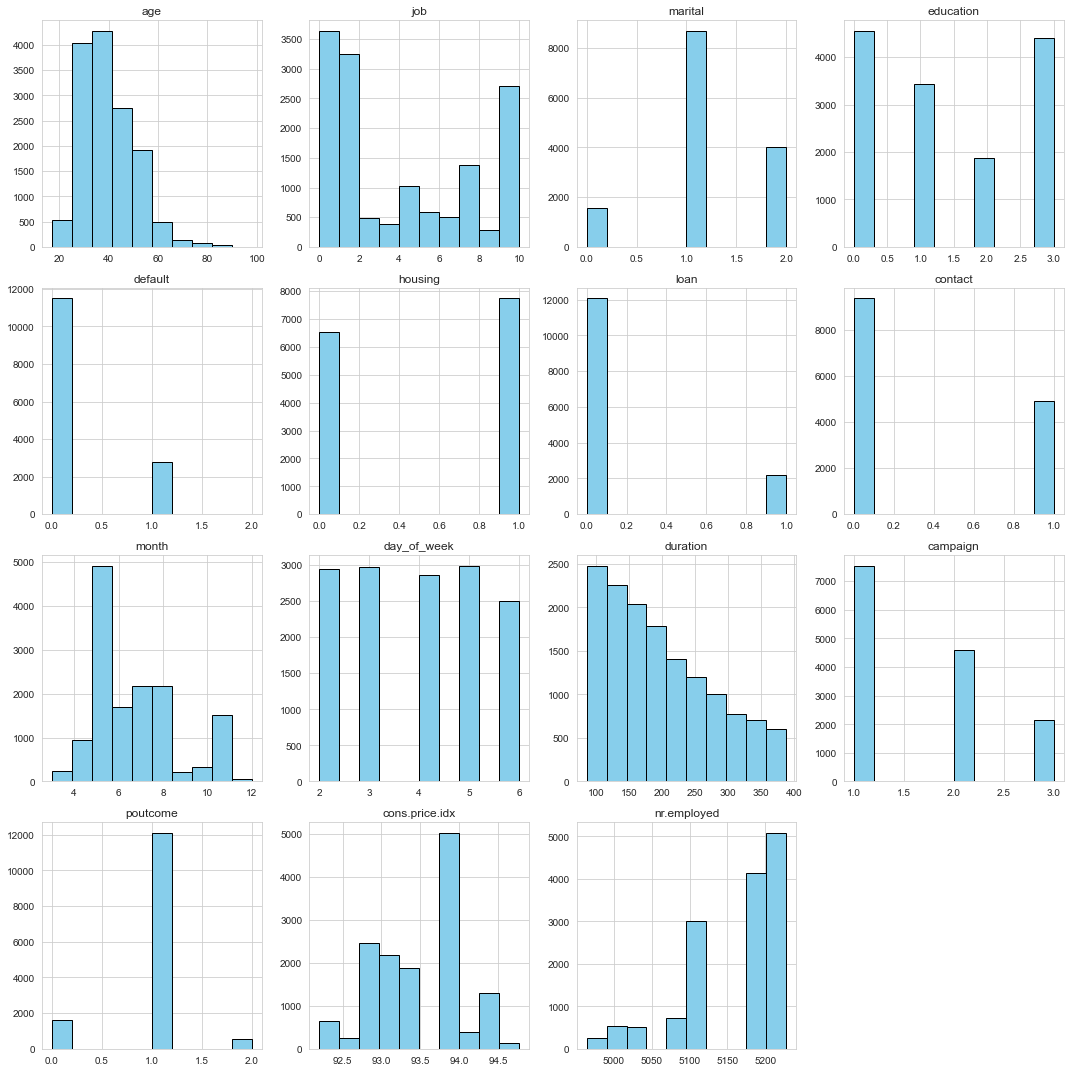

In [125]:
# histograms of the variables
#Histogram for the numerical attributes
X_train.hist(figsize=(15,15),edgecolor='k',color='skyblue')
plt.tight_layout()
plt.show()

# **Oversampling using SMOTE**
 
 I will over sample only on the training data, so no information bleed from test data into the model training.

In [134]:
counter = Counter(y_train)

In [135]:
print("Before SMOTE", counter)

Before SMOTE Counter({0: 13087, 1: 13087})


In [136]:
smt = SMOTE()

In [137]:
X_train,y_train = smt.fit_resample(X_train,y_train)

In [138]:
print("After SMOTE", Counter(y_train))

After SMOTE Counter({0: 13087, 1: 13087})


In [139]:
y_train.isna().sum()

0

In [140]:
y_test.isna().sum()

0

In [141]:
y_test.isin([0]).any().any()

True

In [142]:
y_train.isin([0]).any().any()

True

In [143]:
print(Counter(y_test))

Counter({0: 10949, 1: 1408})


In [144]:
y_train.shape

(26174,)

In [145]:
X_train.shape

(26174, 15)

In [146]:
X_test.shape

(12357, 15)

In [147]:
y_test.shape

(12357,)

# **Classification with all Features**

**RandomForest with all 15 Features**


In [148]:
#see the classification performance of the Random Forest using  all 15 features 
# To improve the results of RF I tested n_estimators for 40,50,100,200,10000 
#with max_depth of 2, 3 and 4

FullRandFor = RandomForestClassifier(n_estimators=50, random_state=43, max_depth=3)
FullRandFor.fit(X_train, y_train)

fulltrainpred = FullRandFor.predict_proba(X_train)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, fulltrainpred[:,1])))

fulltestpred = FullRandFor.predict_proba(X_test)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, fulltestpred[:,1])))

Accuracy on training set: 0.9523342351611803
Accuracy on test set: 0.8168103056837901


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

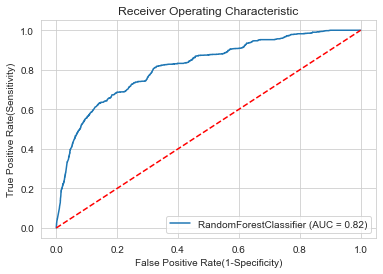

In [149]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(FullRandFor, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

In [150]:
pred6 = FullRandFor.predict(X_test)

In [151]:
print("Random Forest with all 15 Features")
cm = confusion_matrix(y_test, pred6)
print(cm)
print('\n')
print(classification_report(y_test,pred6))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Random Forest with all 15 Features
[[9635 1314]
 [ 569  839]]


              precision    recall  f1-score   support

           0       0.94      0.88      0.91     10949
           1       0.39      0.60      0.47      1408

    accuracy                           0.85     12357
   macro avg       0.67      0.74      0.69     12357
weighted avg       0.88      0.85      0.86     12357

TP:  839 , FP:  1314 , TN:  9635 , FN: 569


In [152]:
fulltestpred = FullRandFor.predict_proba(X_test)
prob3 = fulltestpred[:, 1]# Keeping only the values in positive label

In [153]:
#The average precision (PR AUC) is returned by passing the 
#true label & the probability estimate.
# Average precision score
PR_AUC = average_precision_score(y_test, prob3)
print(PR_AUC)

0.4176864591176433


In [154]:
#Brier skill score calculates the mean squared error between predicted 
#probabilities and the expected values(actuals). 
#compute the Brier Score-perfect skill has a score of 0.0 and the worst
#has a score of 1.0. From this score, we can infer that our model 
#has good performance or skill.
loss = brier_score_loss(y_test, prob3)
loss

0.12267848756224509

**Decision Tree with all 15 Features**

In [155]:
%%time
dtree15 = DecisionTreeClassifier()
dtree15.fit(X_train, y_train)

train_pred15 = dtree15.predict_proba(X_train)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, train_pred15[:,1])))

test_pred15 = dtree15.predict_proba(X_test)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, test_pred15[:,1])))

Accuracy on training set: 1.0
Accuracy on test set: 0.6284957400634347
Wall time: 144 ms


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

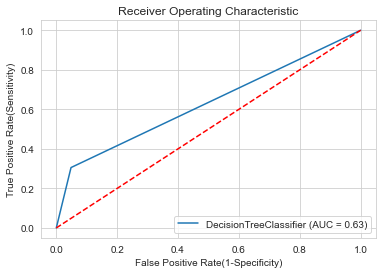

In [156]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(dtree15,X_test,y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

In [157]:
pred15 = dtree15.predict(X_test)

In [158]:
print("DecisionTree with all 15 Features")
cm = confusion_matrix(y_test, pred15)
print(cm)
print('\n')
print(classification_report(y_test,pred15))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

DecisionTree with all 15 Features
[[10419   530]
 [  978   430]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93     10949
           1       0.45      0.31      0.36      1408

    accuracy                           0.88     12357
   macro avg       0.68      0.63      0.65     12357
weighted avg       0.86      0.88      0.87     12357

TP:  430 , FP:  530 , TN:  10419 , FN: 978


In [159]:
test_pred15 = dtree15.predict_proba(X_test)
prob15 = test_pred15[:, 1]# Keeping only the values in positive label

In [160]:
#The average precision (PR AUC) is returned by passing t
#he true label & the probability estimate.
# Average precision score
PR_AUC = average_precision_score(y_test, prob15)
print(PR_AUC)

0.2159381556540919


In [161]:
#Brier skill score calculates the mean squared error between 
#predicted probabilities and the expected values(actuals). 
#compute the Brier Score-perfect skill has a score of 0.0 and the worst has a score of 1.0
#From this score, we can infer that our model has good performance or skill.
loss15 = brier_score_loss(y_test, prob15)
loss15

0.12203609290280812

**Logistic Regression with with all 15 Features**

In [162]:
#Logistic Regression

LR15 = LogisticRegression (solver='liblinear')
LR15.fit(X_train, y_train)

LRtrain_pred15 = LR15.predict_proba(X_train)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, LRtrain_pred15[:,1])))

LRtest_pred15 = LR15.predict_proba(X_test)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, LRtest_pred15[:,1])))

Accuracy on training set: 0.9307314833027927
Accuracy on test set: 0.8458204853701874


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

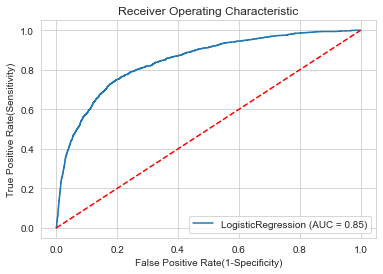

In [163]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(LR15, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

In [164]:
pred16 = LR15.predict(X_test)

In [165]:
print("LogisticRegression with all 15 Features")
cm = confusion_matrix(y_test, pred16)
print(cm)
print('\n')
print(classification_report(y_test,pred16))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

LogisticRegression with all 15 Features
[[9467 1482]
 [ 481  927]]


              precision    recall  f1-score   support

           0       0.95      0.86      0.91     10949
           1       0.38      0.66      0.49      1408

    accuracy                           0.84     12357
   macro avg       0.67      0.76      0.70     12357
weighted avg       0.89      0.84      0.86     12357

TP:  927 , FP:  1482 , TN:  9467 , FN: 481


In [166]:
LRtest_pred15 = LR15.predict_proba(X_test)
prob16 = LRtest_pred15[:, 1]# Keeping only the values in positive label

In [167]:
#The average precision (PR AUC) is returned by passing the true label & the probability estimate.
# Average precision score
PR_AUC = average_precision_score(y_test, prob16)
print(PR_AUC)

0.4606694341877773


In [168]:
#Brier skill score calculates the mean squared error between predicted 
#probabilities and the expected values(actuals). 
#compute the Brier Score-perfect skill has a score of 0.0 and the 
#worst has a score of 1.0. From this score, we can infer that our model 
#has good performance or skill.
loss16 = brier_score_loss(y_test, prob16)
loss16

0.11792448625154493

# Clasification with Filter Methods for Feature Selection-Mutual Information Gain


In [169]:
#I have tested deferent qty  of Features and found that 10  has the best accuracy for all algorithms. 

MI=mutual_info_classif(X_train, y_train)

In [170]:
len(MI)

15

In [171]:
MI = pd.Series(MI)
MI.index = X_train.columns

In [172]:
MI.sort_values(ascending=False, inplace = True)

<AxesSubplot:>

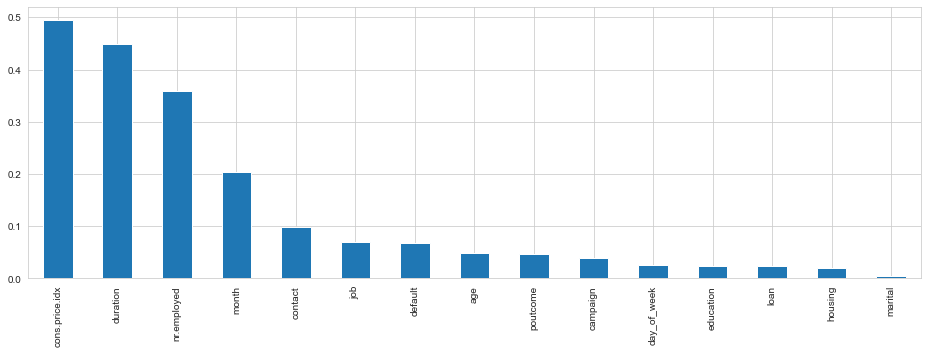

In [173]:
MI.plot.bar(figsize = (16,5))

In [174]:
#percentile=65
sel = SelectPercentile(mutual_info_classif, percentile=65).fit(X_train, y_train)
X_train.columns[sel.get_support()]

Index(['age', 'job', 'default', 'contact', 'month', 'duration', 'campaign',
       'poutcome', 'cons.price.idx', 'nr.employed'],
      dtype='object')

In [175]:
len(X_train.columns[sel.get_support()])

10

In [176]:
X_trainMI = sel.transform(X_train)
X_testMI = sel.transform(X_test)

In [177]:
X_trainMI.shape

(26174, 10)

In [178]:
X_testMI.shape

(12357, 10)

**Random Forests with Mutual Information Gain-Filter**

In [179]:
## To improve the results of RF I tested n_estimators for 40,50,100,200,10000 
#with max_depth of 2, 3 and 4 and found that
#n_estimators=50 and max_depth=3 is the best combination.

RandFor = RandomForestClassifier(n_estimators=50, random_state=41, max_depth=3)
RandFor.fit(X_trainMI, y_train)

trainpred = RandFor.predict_proba(X_trainMI)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, trainpred[:,1])))

testpred = RandFor.predict_proba(X_testMI)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, testpred[:,1])))

Accuracy on training set: 0.953537621735943
Accuracy on test set: 0.8196679504251115


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

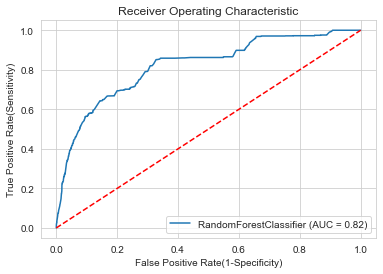

In [180]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(RandFor,X_testMI,y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

In [181]:
pred3 = RandFor.predict(X_testMI)

In [182]:
print("RandomForest with Mutual Information Gain")
cm = confusion_matrix(y_test, pred3)
print(cm)
print('\n')
print(classification_report(y_test,pred3))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

RandomForest with Mutual Information Gain
[[9664 1285]
 [ 588  820]]


              precision    recall  f1-score   support

           0       0.94      0.88      0.91     10949
           1       0.39      0.58      0.47      1408

    accuracy                           0.85     12357
   macro avg       0.67      0.73      0.69     12357
weighted avg       0.88      0.85      0.86     12357

TP:  820 , FP:  1285 , TN:  9664 , FN: 588


In [183]:
#our aim is to find the brier score loss, so we will first 
#calculate the probabilities for each data entry in 
#X using the predict_proba() function.

In [184]:
testpred = RandFor.predict_proba(X_testMI)
prob = testpred[:, 1]# Keeping only the values in positive label

In [185]:
#The average precision (PR AUC) is returned by passing the true label & the probability estimate.
# Average precision score
PR_AUC = average_precision_score(y_test, prob)
print(PR_AUC)

0.4249346199507228


In [186]:
#Brier skill score calculates the mean squared error between predicted 
#probabilities and the expected values(actuals). 
#compute the Brier Score-perfect skill has a score of 0.0 and the worst has a score of 1.0
#From this score, we can infer that our model has good performance or skill.
loss = brier_score_loss(y_test, prob)
loss

0.11585612560436982

**Decision Tree with Mutual Information Gain-Filter**

In [187]:
%%time
dtreeMI = DecisionTreeClassifier()
dtreeMI.fit(X_trainMI, y_train)

train_predMI = dtreeMI.predict_proba(X_trainMI)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, train_predMI[:,1])))

test_predMI = dtreeMI.predict_proba(X_testMI)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, test_predMI[:,1])))

Accuracy on training set: 0.9999999883225023
Accuracy on test set: 0.624325092733666
Wall time: 120 ms


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

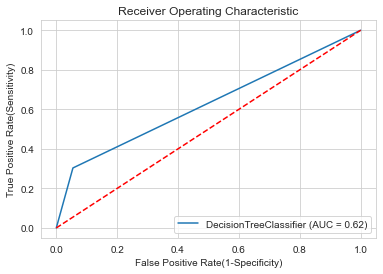

In [188]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(dtreeMI,X_testMI,y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

In [189]:
pred4 = dtreeMI.predict(X_testMI)

In [190]:
print("DecisionTree with Mutual Information Gain")
cm = confusion_matrix(y_test, pred4)
print(cm)
print('\n')
print(classification_report(y_test,pred4))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

DecisionTree with Mutual Information Gain
[[10351   598]
 [  981   427]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93     10949
           1       0.42      0.30      0.35      1408

    accuracy                           0.87     12357
   macro avg       0.67      0.62      0.64     12357
weighted avg       0.86      0.87      0.86     12357

TP:  427 , FP:  598 , TN:  10351 , FN: 981


In [191]:
test_predMI = dtreeMI.predict_proba(X_testMI)
prob1 = test_predMI[:, 1]# Keeping only the values in positive label

In [192]:
#The average precision (PR AUC) is returned by passing the true 
#label & the probability estimate.
# Average precision score
PR_AUC = average_precision_score(y_test, prob1)
print(PR_AUC)

0.2057248141017049


In [193]:
#Brier skill score calculates the mean squared error between predicted
#probabilities and the expected values(actuals). 
#compute the Brier Score-perfect skill has a score of 0.0 and the worst has a score of 1.0
#From this score, we can infer that our model has good performance or skill.
loss = brier_score_loss(y_test, prob1)
loss

0.12778182406733027

**Logistic Regression with Mutual Information Gain-Filter**

In [194]:
#Logistic Regression

LR = LogisticRegression (solver='liblinear')
LR.fit(X_trainMI, y_train)

LRtrain_predMI = LR.predict_proba(X_trainMI)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, LRtrain_predMI[:,1])))

LRtest_predMI = LR.predict_proba(X_testMI)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, LRtest_predMI[:,1])))

Accuracy on training set: 0.9206626251275263
Accuracy on test set: 0.8747525329212299


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

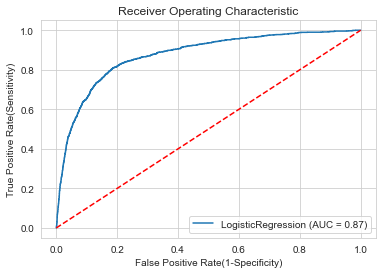

In [195]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(LR, X_testMI, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

In [196]:
pred5 = LR.predict(X_testMI)

In [197]:
print("LogisticRegression with Mutual Information Gain")
cm = confusion_matrix(y_test, pred5)
print(cm)
print('\n')
print(classification_report(y_test,pred5))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

LogisticRegression with Mutual Information Gain
[[9057 1892]
 [ 295 1113]]


              precision    recall  f1-score   support

           0       0.97      0.83      0.89     10949
           1       0.37      0.79      0.50      1408

    accuracy                           0.82     12357
   macro avg       0.67      0.81      0.70     12357
weighted avg       0.90      0.82      0.85     12357

TP:  1113 , FP:  1892 , TN:  9057 , FN: 295


In [198]:
LRtest_predMI = LR.predict_proba(X_testMI)
prob2 = LRtest_predMI[:, 1]# Keeping only the values in positive label

In [199]:
#The average precision (PR AUC) is returned by passing the true label & the probability estimate.
# Average precision score
PR_AUC = average_precision_score(y_test, prob2)
print(PR_AUC)

0.5125266956993272


In [200]:
#Brier skill score calculates the mean squared error between predicted 
#probabilities and the expected values(actuals). 
#compute the Brier Score-perfect skill has a score of 0.0 and the worst has a score of 1.0
#From this score, we can infer that our model has good performance or skill.
loss = brier_score_loss(y_test, prob2)
loss

0.1293542950168066

 # Classification Embedded Methods -LASSO Regularization (L1):
These methods encompass the benefits of both the wrapper and filter methods

In [201]:
# I have tested to find the best accuracy rate match of C = 0.002, 0.003, 0.01, 0.1, 0.5 
#with max_inter = 10000 and execution time is 39.8s
#max_inter = 10000 was chosen because of the warning "ConvergenceWarning: Liblinear failed to converge, 
#increase the number of iterations."

Sel = SelectFromModel(LogisticRegression(penalty ='l1', C = 0.001, solver ='liblinear',max_iter=10000))


In [202]:

Sel.fit(X_train, y_train)
Sel.get_support()

array([ True, False, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True,  True])

In [203]:
Sel.estimator_.coef_

array([[ 0.00420017,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.17118194,  0.01367026, -0.01625258,
         0.00576764, -0.17479321,  0.        ,  1.03794329, -0.01915929]])

In [204]:
X_train_l1 = Sel.transform(X_train)
X_test_l1 = Sel.transform(X_test)
X_train_l1.shape

(26174, 8)

**Random Forest with LASSO Regularization (L1)**

In [205]:
# To improve the results of RF I tested n_estimators for 40,50,100,200,10000 
#with max_depth of 2, 3 and 4

L1RandFor = RandomForestClassifier(n_estimators=50, random_state=43, max_depth=3)
L1RandFor.fit(X_train_l1, y_train)

L1trainpred = L1RandFor.predict_proba(X_train_l1)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, L1trainpred[:,1])))

L1testpred = L1RandFor.predict_proba(X_test_l1)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, L1testpred[:,1])))

Accuracy on training set: 0.9549040057431336
Accuracy on test set: 0.8238520900621892


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

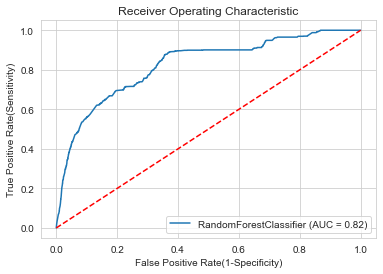

In [206]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(L1RandFor, X_test_l1, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

In [207]:
pred7 = L1RandFor.predict(X_test_l1)

In [208]:
print("RandomForest with LASSO Regularization (L1)")
cm = confusion_matrix(y_test, pred7)
print(cm)
print('\n')
print(classification_report(y_test,pred7))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

RandomForest with LASSO Regularization (L1)
[[9763 1186]
 [ 605  803]]


              precision    recall  f1-score   support

           0       0.94      0.89      0.92     10949
           1       0.40      0.57      0.47      1408

    accuracy                           0.86     12357
   macro avg       0.67      0.73      0.69     12357
weighted avg       0.88      0.86      0.87     12357

TP:  803 , FP:  1186 , TN:  9763 , FN: 605


In [209]:
L1testpred = L1RandFor.predict_proba(X_test_l1)
prob4 = L1testpred[:, 1]# Keeping only the values in positive label

In [210]:
#The average precision (PR AUC) is returned by passing the true label 
#& the probability estimate.
# Average precision score
PR_AUC = average_precision_score(y_test, prob4)
print(PR_AUC)

0.41979331254235264


In [211]:
#Brier skill score calculates the mean squared error between predicted 
#probabilities and the expected values(actuals). 
#compute the Brier Score-perfect skill has a score of 0.0 and the 
#worst has a score of 1.0. From this score, we can infer that our model has good performance or skill.
loss = brier_score_loss(y_test, prob4)
loss

0.11472601804775759

**Decision Tree with LASSO Regularization (L1)**

In [212]:
%%time
dtreeL1 = DecisionTreeClassifier()
dtreeL1.fit(X_train_l1, y_train)

train_predL1 = dtreeL1.predict_proba(X_train_l1)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, train_predL1[:,1])))

test_predL1 = dtreeL1.predict_proba(X_test_l1)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, test_predL1[:,1])))

Accuracy on training set: 0.9999999737256301
Accuracy on test set: 0.6503772462096996
Wall time: 99.8 ms


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

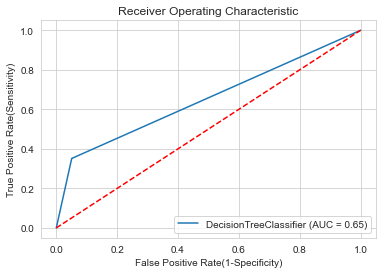

In [213]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(dtreeL1, X_test_l1, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

In [214]:
pred8= dtreeL1.predict(X_test_l1)

In [215]:
print("DecisionTree with LASSO Regularization (L1)")
cm = confusion_matrix(y_test, pred8)
print(cm)
print('\n')
print(classification_report(y_test,pred8))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

DecisionTree with LASSO Regularization (L1)
[[10394   555]
 [  913   495]]


              precision    recall  f1-score   support

           0       0.92      0.95      0.93     10949
           1       0.47      0.35      0.40      1408

    accuracy                           0.88     12357
   macro avg       0.70      0.65      0.67     12357
weighted avg       0.87      0.88      0.87     12357

TP:  495 , FP:  555 , TN:  10394 , FN: 913


In [216]:
test_predL1 = dtreeL1.predict_proba(X_test_l1)
prob5 = test_predL1[:, 1]# Keeping only the values in positive label

In [217]:
#The average precision (PR AUC) is returned by passing the true label & the probability estimate.
# Average precision score
PR_AUC = average_precision_score(y_test, prob5)
print(PR_AUC)

0.2396218543711488


In [219]:
#Brier skill score calculates the mean squared error between predicted probabilities 
#and the expected values(actuals). 
#compute the Brier Score-perfect skill has a score of 0.0 and the worst has a score of 1.0
#From this score, we can infer that our model has good performance or skill.
loss = brier_score_loss(y_test, prob5)
loss

0.11883952415634863

**Logistic Regression with LASSO Regularization (L1)**

In [220]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_l1, y_train)

train_predLR = logreg.predict_proba(X_train_l1)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, train_predLR[:,1])))

test_predLR = logreg.predict_proba(X_test_l1)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, test_predLR[:,1])))

Accuracy on training set: 0.9128377995743073
Accuracy on test set: 0.8792623042058636


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

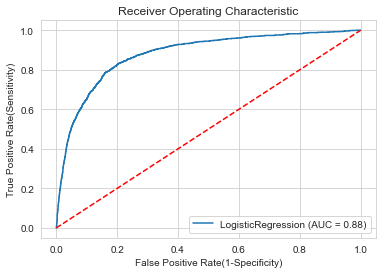

In [221]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(logreg, X_test_l1, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

In [222]:
pred9= logreg.predict(X_test_l1)

In [223]:
print("Logistic Regression with LASSO Regularization (L1)")
cm = confusion_matrix(y_test, pred9)
print(cm)
print('\n')
print(classification_report(y_test,pred9))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Logistic Regression with LASSO Regularization (L1)
[[8976 1973]
 [ 277 1131]]


              precision    recall  f1-score   support

           0       0.97      0.82      0.89     10949
           1       0.36      0.80      0.50      1408

    accuracy                           0.82     12357
   macro avg       0.67      0.81      0.69     12357
weighted avg       0.90      0.82      0.84     12357

TP:  1131 , FP:  1973 , TN:  8976 , FN: 277


In [224]:
test_predLR = logreg.predict_proba(X_test_l1)
prob6 = test_predLR[:, 1]# Keeping only the values in positive label

In [225]:
#The average precision (PR AUC) is returned by passing the true label 
#& the probability estimate.
# Average precision score
PR_AUC = average_precision_score(y_test, prob6)
print(PR_AUC)

0.5121310219511821


In [226]:
#Brier skill score calculates the mean squared error between predicted 
#probabilities and the expected values(actuals). 
#compute the Brier Score-perfect skill has a score of 0.0 and the worst 
#has a score of 1.0. From this score, we can infer that our model has good performance or skill.
loss = brier_score_loss(y_test, prob6)
loss

0.13342312169106227

# Classification with Wrapper Feature Selection - Forward feature selection

Filter methods measure the relevance of features by their correlation with dependent variable
while wrapper methods measure the usefulness of a subset of feature by actually training a model on it.


In [227]:
# Build step forward feature selection
# estimator is  the RandomForestClassifieras   passes to the SequentialFeatureSelector function. 
#The k_features specifies the number of features to select.  The forward parameter, set to True, performs 
#step forward feature selection. The verbose parameter is used for logging the progress of 
#the feature selector, the scoring parameter defines the performance evaluation criteria 
#cv refers to cross-validation folds.
sfs = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=(1, 15),
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [228]:
# call the fit method on our feature selector 
#480 secends execution time

sfs1 = sfs.fit(np.array(X_train.fillna(0)), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   20.2s finished

[2021-11-07 17:33:26] Features: 1/15 -- score: 0.972320454521692[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   18.5s finished

[2021-11-07 17:33:44] Features: 2/15 -- score: 0.975914616245537[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   22.2s finished

[2021-11-07 17:34:06] Features: 3/15 -- score: 0.9824320716420956[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [229]:
pd.DataFrame.from_dict(sfs1 .get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(13,)","[0.959912278964736, 0.9770724951578482, 0.9773...",0.97232,"(13,)",0.011581,0.007225,0.004171
2,"(10, 13)","[0.9621772739432451, 0.9819556520913914, 0.979...",0.975915,"(10, 13)",0.012806,0.007989,0.004612
3,"(0, 10, 13)","[0.9774059535302874, 0.9848222265230362, 0.982...",0.982432,"(0, 10, 13)",0.004789,0.002988,0.001725
4,"(0, 9, 10, 13)","[0.980882046900126, 0.9900367402006205, 0.9908...",0.98802,"(0, 9, 10, 13)",0.006622,0.004131,0.002385
5,"(0, 9, 10, 13, 14)","[0.9827994792445047, 0.9926832974904503, 0.993...",0.990285,"(0, 9, 10, 13, 14)",0.006936,0.004327,0.002498
6,"(0, 1, 9, 10, 13, 14)","[0.9840913735720136, 0.9939235384622283, 0.993...",0.990908,"(0, 1, 9, 10, 13, 14)",0.006424,0.004007,0.002314
7,"(0, 1, 3, 9, 10, 13, 14)","[0.984537992957957, 0.9946913800730508, 0.9946...",0.991859,"(0, 1, 3, 9, 10, 13, 14)",0.006813,0.00425,0.002454
8,"(0, 1, 3, 8, 9, 10, 13, 14)","[0.983829510673657, 0.9954318538118496, 0.9957...",0.99243,"(0, 1, 3, 8, 9, 10, 13, 14)",0.007985,0.004981,0.002876
9,"(0, 1, 2, 3, 8, 9, 10, 13, 14)","[0.9848210589517039, 0.9962706370568086, 0.996...",0.993066,"(0, 1, 2, 3, 8, 9, 10, 13, 14)",0.007668,0.004784,0.002762
10,"(0, 1, 2, 3, 8, 9, 10, 11, 13, 14)","[0.985353144559155, 0.9971600461947263, 0.9965...",0.993527,"(0, 1, 2, 3, 8, 9, 10, 11, 13, 14)",0.007666,0.004782,0.002761


In [230]:
sfs1.k_feature_names_

('0', '1', '2', '3', '5', '7', '8', '9', '10', '11', '12', '13', '14')

In [231]:
#The best combination of features
sfs1.k_score_

0.9943265474169658

In [232]:
filtered_features= X_train.columns[list(sfs1.k_feature_idx_)]
filtered_features
 

Index(['age', 'job', 'marital', 'education', 'housing', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'poutcome', 'cons.price.idx',
       'nr.employed'],
      dtype='object')

In [233]:
len(filtered_features)

13

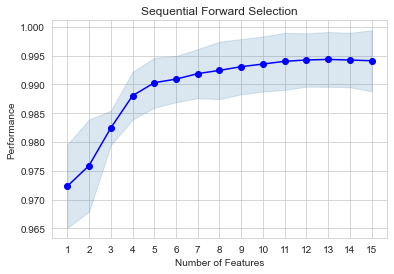

In [234]:

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
#plt.grid()
plt.show()

In [235]:
#see the classification performance of the Random Forest using  optimized 
#amount of features that was chosen by forward feature selection.

# To improve the results of RF I tested n_estimators for 40,50,100,200,10000 
#with max_depth of 2, 3 and 4

clf = RandomForestClassifier(n_estimators=50, random_state=41, max_depth=3)
clf.fit(X_train[filtered_features].fillna(0), y_train)

train_pred = clf.predict_proba(X_train[filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, train_pred[:,1])))

test_pred = clf.predict_proba(X_test[filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, test_pred [:,1])))

Accuracy on training set: 0.9522830205755933
Accuracy on test set: 0.8167046699989206


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

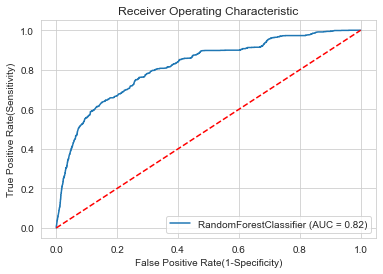

In [236]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(clf, X_test[filtered_features], y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

In [237]:
pred = clf.predict(X_test[filtered_features])

In [238]:
print("Random Forest with Forward feature selection")
cm = confusion_matrix(y_test, pred)
print(cm)
print('\n')
print(classification_report(y_test,pred))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Random Forest with Forward feature selection
[[9745 1204]
 [ 602  806]]


              precision    recall  f1-score   support

           0       0.94      0.89      0.92     10949
           1       0.40      0.57      0.47      1408

    accuracy                           0.85     12357
   macro avg       0.67      0.73      0.69     12357
weighted avg       0.88      0.85      0.86     12357

TP:  806 , FP:  1204 , TN:  9745 , FN: 602


In [239]:
test_pred = clf.predict_proba(X_test[filtered_features].fillna(0))
prob7 = test_pred [:, 1]# Keeping only the values in positive label

In [240]:
#The average precision (PR AUC) is returned by passing the true 
#label & the probability estimate.
# Average precision score
PR_AUC = average_precision_score(y_test, prob7)
print(PR_AUC)

0.4153532995903723


In [241]:
#Brier skill score calculates the mean squared error between 
#predicted probabilities and the expected values(actuals). 
#compute the Brier Score-perfect skill has a score of 0.0 
#and the worst has a score of 1.0
#From this score, we can infer that our model has good performance or skill.
loss = brier_score_loss(y_test, prob7)
loss

0.11684326331451152

In [242]:
%%time
dtree = DecisionTreeClassifier()
dtree.fit(X_train[filtered_features], y_train)

train_predTree = dtree.predict_proba(X_train[filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, train_predTree[:,1])))

test_predTree = dtree.predict_proba(X_test[filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, test_predTree[:,1])))

Accuracy on training set: 1.0
Accuracy on test set: 0.6383626060183993
Wall time: 128 ms


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

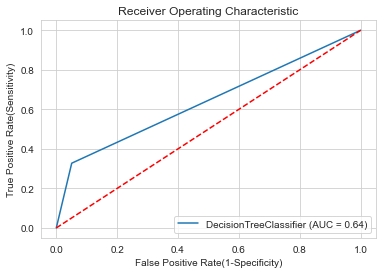

In [243]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(dtree, X_test[filtered_features], y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

In [244]:
pred1 = dtree.predict(X_test[filtered_features])

In [245]:
print("DecisionTree with Forward feature selection")
cm = confusion_matrix(y_test, pred1)
print(cm)
print('\n')
print(classification_report(y_test,pred1))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

DecisionTree with Forward feature selection
[[10394   555]
 [  947   461]]


              precision    recall  f1-score   support

           0       0.92      0.95      0.93     10949
           1       0.45      0.33      0.38      1408

    accuracy                           0.88     12357
   macro avg       0.69      0.64      0.66     12357
weighted avg       0.86      0.88      0.87     12357

TP:  461 , FP:  555 , TN:  10394 , FN: 947


In [246]:
test_predTree = dtree.predict_proba(X_test[filtered_features].fillna(0))
prob8 = test_predTree[:, 1]# Keeping only the values in positive label

In [247]:
#The average precision (PR AUC) is returned by passing the true 
#label & the probability estimate.
# Average precision score
PR_AUC = average_precision_score(y_test, prob8)
print(PR_AUC)

0.22519795466263254


In [248]:
#Brier skill score calculates the mean squared error 
#between predicted probabilities and the expected values(actuals). 
#compute the Brier Score-perfect skill has a score of 0.0 and the worst has a score of 1.0
#From this score, we can infer that our model has good performance or skill.
loss = brier_score_loss(y_test, prob8)
loss

0.12155053815651048

In [249]:
#Logistic Regression

LogitReg = LogisticRegression(solver='liblinear')
LogitReg.fit(X_train[filtered_features], y_train)

train_predReg = LogitReg .predict_proba(X_train[filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, train_predReg[:,1])))

test_predReg = LogitReg .predict_proba(X_test[filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, test_predReg [:,1])))

Accuracy on training set: 0.9207461075586638
Accuracy on test set: 0.8724195962271357


Text(0.5, 0, 'False Positive Rate(1-Specificity)')

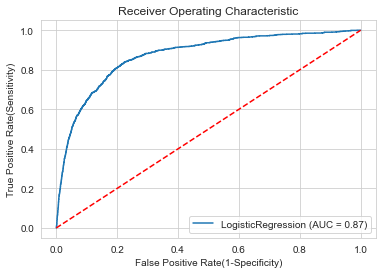

In [250]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(LogitReg, X_test[filtered_features], y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

In [251]:
pred2 = LogitReg.predict(X_test[filtered_features])

In [252]:
print("Logistic Regression with Forward feature selection")
cm = confusion_matrix(y_test, pred2)
print(cm)
print('\n')
print(classification_report(y_test,pred2))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Logistic Regression with Forward feature selection
[[9137 1812]
 [ 343 1065]]


              precision    recall  f1-score   support

           0       0.96      0.83      0.89     10949
           1       0.37      0.76      0.50      1408

    accuracy                           0.83     12357
   macro avg       0.67      0.80      0.70     12357
weighted avg       0.90      0.83      0.85     12357

TP:  1065 , FP:  1812 , TN:  9137 , FN: 343


In [253]:
test_predReg = LogitReg .predict_proba(X_test[filtered_features])
prob9 = test_predReg[:, 1]# Keeping only the values in positive label

In [254]:
#The average precision (PR AUC) is returned by passing the 
#true label & the probability estimate.
# Average precision score
PR_AUC = average_precision_score(y_test, prob9)
print(PR_AUC)

0.5030885905314926


In [255]:
#Brier skill score calculates the mean squared error 
#between predicted probabilities and the expected values(actuals). 
#compute the Brier Score-perfect skill has a score of 0.0 and the worst has a score of 1.0
#From this score, we can infer that our model has good performance or skill.
loss = brier_score_loss(y_test, prob9)
loss

0.12700417982419837

TP-True positives - are when you predict an observation belongs to a class and it actually does belong to that class.

FP-False positives - occur when you predict an observation belongs to a class when in reality it does not.

TN-True negatives - are when you predict an observation does not belong to a class and it actually does not belong to that class.

FN-False negatives - occur when you predict an observation does not belong to a class when in fact it does.

The confusion matrix is in the form of the array object. The dimension of the matrixes is 2*2 because the models are binary classification. It has two classes 0's that are "No"  and 1's that are "Yes". Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. 

When to Use ROC vs. Precision-Recall Curves?

ROC curves should be used when there are roughly equal numbers of observations for each class.
Precision-Recall curves should be used when there is a moderate to large class imbalance.

# Results

The best combination is Filter Feature selection with method of Mutual Information Gain and the classifier Logistic Regression.
Filter is the feistiest among Wrapper and Embeded Methods. Logistic Regression has the best scores with this imbalanced dataset.

AUC score for the best performed combination  is 0.87. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

Precision: how accurate your model is. In other words, when a model makes a prediction, how often it is correct. It is correct at 37%.  

Recall: If there are patients who subscribed in the test set. The Logistic Regression model can identify it 79% of the time.

F1 is 0.5

PR_AUC  can be interpreted as the probability that the scores given by a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one. LR has the best score of 50%. This score might be the most commonly used for comparing classification models for imbalanced problems.

Brier score is 0.13